# this isn't Forecasting

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
data = pd.read_csv("gld_price_data.csv")
data.head(1)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.18,1.471692


In [15]:
df = data.copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
df["Date"] = pd.to_datetime(df['Date'])

In [19]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [28]:
df["year"] = pd.DatetimeIndex(df.Date).year

In [29]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD,year
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,2008
...,...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,2018
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,2018
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,2018
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118,2018


In [31]:
g = df.groupby("year")["GLD"].mean()
g

year
2008     86.111148
2009     95.834464
2010    119.966397
2011    152.591486
2012    162.151507
2013    136.853213
2014    121.721294
2015    111.165561
2016    118.780634
2017    119.546101
2018    126.017056
Name: GLD, dtype: float64

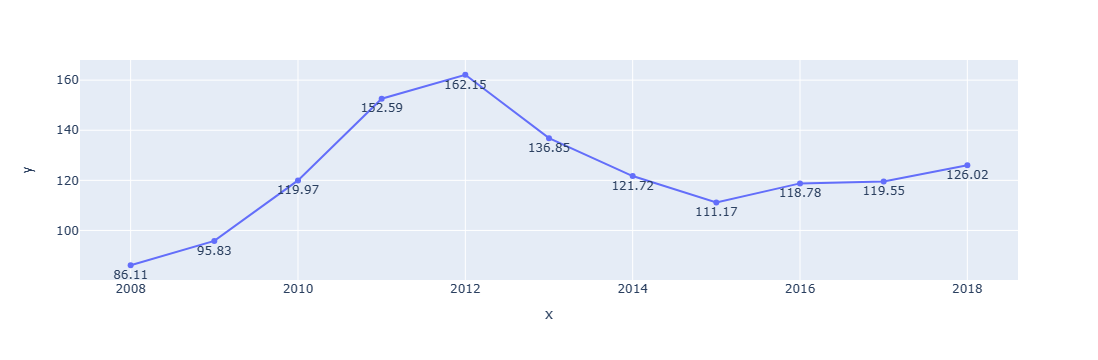

In [39]:
iplot(px.line(x=g.index,y=g.values,text=np.round(g.values,2)).update_traces(textposition="bottom center"))

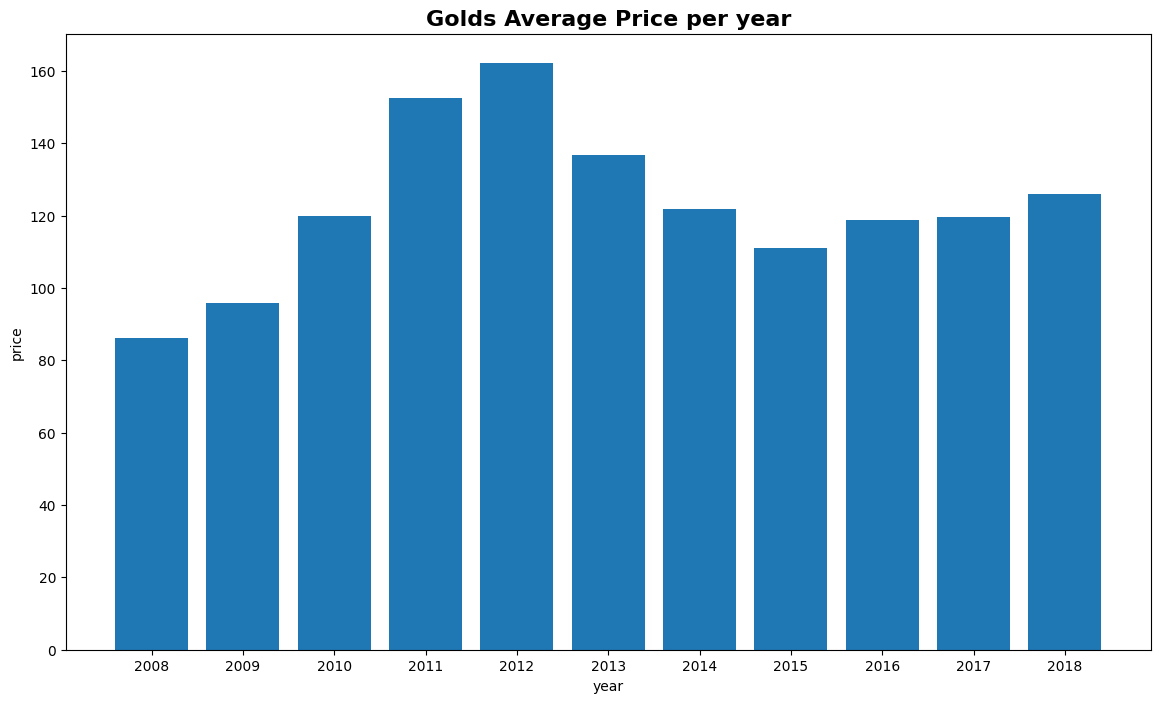

In [53]:
plt.figure(figsize=(14,8))
plt.title("Golds Average Price per year",fontsize=16,weight='bold')
plt.bar(x=g.index,height=g.values)
plt.xlabel("year")
plt.xticks(g.index)
plt.ylabel("price")
plt.show()

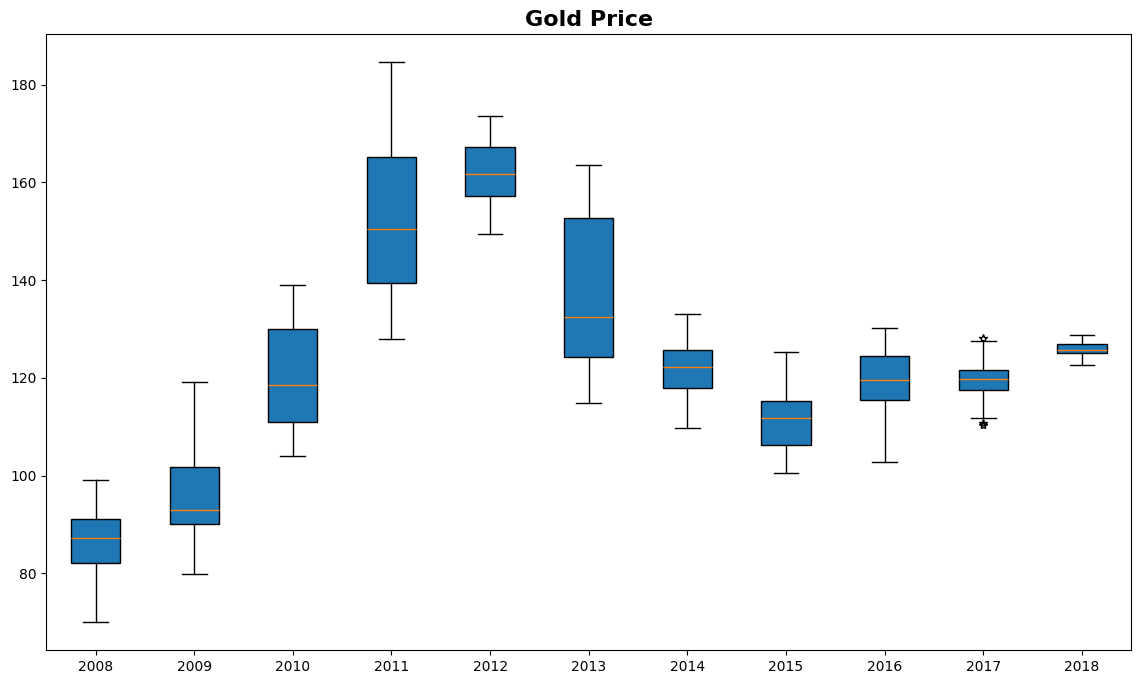

In [65]:
g1 = df.groupby("year")["GLD"]
j = 1
plt.figure(figsize=(14,8))
plt.title("Gold Price",fontsize=16,weight='bold')
for i,d in g1:
    plt.boxplot(d,positions=[i],patch_artist=True,widths=0.5,sym='*')
plt.show()

<Axes: xlabel='GLD', ylabel='Density'>

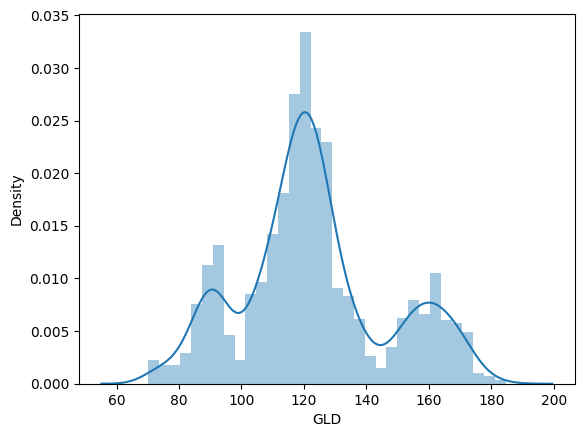

In [68]:
sns.distplot(df["GLD"])

<Axes: >

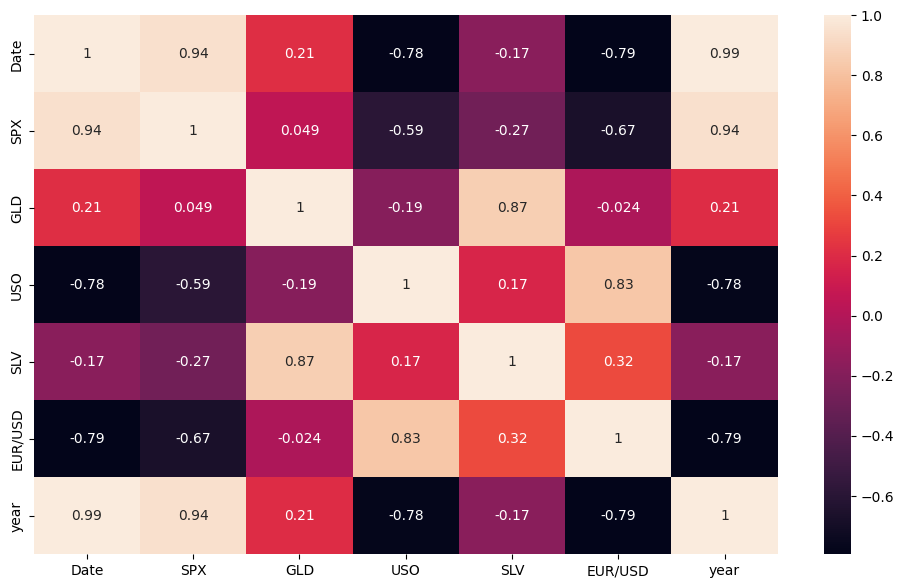

In [70]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

In [72]:
df.drop("Date",axis=1,inplace=True)

In [86]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("GLD",axis=1),df["GLD"],test_size=20)

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
pred = lr.predict(x_test)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9487376172460793

In [91]:
xgb = XGBRegressor(n_estimators=100)

In [92]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [93]:
pred = xgb.predict(x_test)

In [95]:
r2_score(y_test,pred)

0.9948465238067425

In [96]:
rf = RandomForestRegressor()

In [97]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
pred = rf.predict(x_test)

In [100]:
r2_score(y_test,pred)

0.9961071330130414